### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to **distinguish between customers who accepted a driving coupon versus those that did not**.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether they will accept the coupon if they are the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.

#### 1. Read in the coupons.csv file.

In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [5]:
# Check the size of this dataset and the column types?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Initial thoughts of this data:
- passanger is spelled wrong, fix
- mix of CamelCase and snake_case, standardize to one
- car column has almost no data
- Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 are missing some data
- most of these columns are categorical

In [6]:
# coupon column represents the type of coupon offered to the customer. Quick check on the counts of these:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**Note**

`coupon` column string values do not exactly match the corresponding column names.

In [7]:
# Very few rows have values for the car column. This column is likely not useful in our analysis.
data['car'].value_counts()
# TODO: Drop car column

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [8]:
# Review the counts of these "number of times visited" columns
fields = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for fld in fields:
    print(data[fld].value_counts())
    print()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64



**Summary:**

Nothing stands out in the "number of times visited" data above as being unusual or unexpected.

**Let's look at the location columns:**

In [9]:
fields = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
for fld in fields:
    print(data[fld].value_counts())
    print()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64



**Summary:**

Every row has the 5min column set to 1. So this column likely not informative. Assuming "GEQ" here means "greater than or equal to", so every coupon is a minimun of 5 minutes away from the potential customer. ~14% are greater than 25 minutes away, looking at the data it appears most of the coupons are ~15-20 minutes away.

Considering that `toCoupon_GEQ5min` is the same for all rows, and `toCoupon_GEQ25min` has few rows set to true, I would not expect this information to be deterministic of accepting the coupon.

**Direction columns**

If the data is complete for these two columns, we expect the counts to be the exact opposite

In [10]:
data['direction_same'].value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [11]:
data['direction_opp'].value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

**Summary:**

The direction columns look good

**Rename Columns**

Renaming columns to fix typos and have consistency in naming conventions.

In [12]:
# Create a new DataFrame with columns renamed
column_map = {
    'passanger': 'passenger',
    'maritalStatus': 'marital_status',
    'Bar': 'bar',
    'CoffeeHouse': 'coffee_house',
    'CarryAway': 'carry_away',
    'RestaurantLessThan20': 'restaurant_20',
    'Restaurant20To50': 'restaurant_50',
    'toCoupon_GEQ5min': 'to_coupon_5min',
    'toCoupon_GEQ15min': 'to_coupon_15min',
    'toCoupon_GEQ25min': 'to_coupon_25min',
}

In [13]:
df = data.rename(columns=column_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      12684 non-null  object
 1   passenger        12684 non-null  object
 2   weather          12684 non-null  object
 3   temperature      12684 non-null  int64 
 4   time             12684 non-null  object
 5   coupon           12684 non-null  object
 6   expiration       12684 non-null  object
 7   gender           12684 non-null  object
 8   age              12684 non-null  object
 9   marital_status   12684 non-null  object
 10  has_children     12684 non-null  int64 
 11  education        12684 non-null  object
 12  occupation       12684 non-null  object
 13  income           12684 non-null  object
 14  car              108 non-null    object
 15  bar              12577 non-null  object
 16  coffee_house     12467 non-null  object
 17  carry_away       12533 non-null

In [14]:
# Look at an example row
df.iloc[100]

destination          No Urgent Place
passenger                      Alone
weather                        Sunny
temperature                       55
time                            10AM
coupon                  Coffee House
expiration                        2h
gender                          Male
age                               21
marital_status                Single
has_children                       0
education          Associates degree
occupation                   Student
income               $12500 - $24999
car                              NaN
bar                              1~3
coffee_house                   less1
carry_away                       1~3
restaurant_20                  less1
restaurant_50                    1~3
to_coupon_5min                     1
to_coupon_15min                    0
to_coupon_25min                    0
direction_same                     0
direction_opp                      1
Y                                  1
Name: 100, dtype: object

#### 3. Decide what to do about your missing data -- drop, replace, other...

Dropping the car column since it has so little data, less than 1% of it's rows have values. Also the values we do have in these 108 rows looks incomplete. We have 22 rows listed as "Mazda5", that's the only car make and model listed. If we have reliable car descriptions we would expect to see a distribution of car makes and models.

In [15]:
df = df.drop(columns=['car'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      12684 non-null  object
 1   passenger        12684 non-null  object
 2   weather          12684 non-null  object
 3   temperature      12684 non-null  int64 
 4   time             12684 non-null  object
 5   coupon           12684 non-null  object
 6   expiration       12684 non-null  object
 7   gender           12684 non-null  object
 8   age              12684 non-null  object
 9   marital_status   12684 non-null  object
 10  has_children     12684 non-null  int64 
 11  education        12684 non-null  object
 12  occupation       12684 non-null  object
 13  income           12684 non-null  object
 14  bar              12577 non-null  object
 15  coffee_house     12467 non-null  object
 16  carry_away       12533 non-null  object
 17  restaurant_20    12554 non-null

**Check for any duplicates**

In [70]:
# Any duplicate rows?
dups = df[df.duplicated()]
dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 4192 to 8516
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      74 non-null     object
 1   passenger        74 non-null     object
 2   weather          74 non-null     object
 3   temperature      74 non-null     int64 
 4   time             74 non-null     object
 5   coupon           74 non-null     object
 6   expiration       74 non-null     object
 7   gender           74 non-null     object
 8   age              74 non-null     object
 9   marital_status   74 non-null     object
 10  has_children     74 non-null     int64 
 11  education        74 non-null     object
 12  occupation       74 non-null     object
 13  income           74 non-null     object
 14  bar              74 non-null     object
 15  coffee_house     74 non-null     object
 16  carry_away       73 non-null     object
 17  restaurant_20    73 non-null     obje

In [69]:
dups

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_20,restaurant_50,to_coupon_5min,to_coupon_15min,to_coupon_25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


This data is anonymized, as best I can tell there is no unique ID for each row, so it seems entirely possible we could have matching rows that are not "duplicate" in the sense of the same person. We could simply be seeing similar bucketed conditions. The count of duplicate rows is also small, 74 out of 12684 rows, or ~0.6%. For now I'll leave these rows in the dataset as I'm not confident they're duplicates that should be removed and the count isn't large enough to have a big impact on our result.

**Missing Data?**

Some of the "number of times" columns are missing data (eg `coffee_house`, `bar`) but the number of rows missing values is small, <2% so I won't worry about filling these in unless there appears to be some key differentiation in this data and these missing values could impact the result.

**Age column**

The age column is a string type (or object) and we'll want to do some numeric comparisions later. Looking at the value_counts, the column is age buckets, not exact age of the individual. Based on the values, the number is the lower bound of the age bin. Rename these and update the type. Technically these are all "drivers", so we could assume the lower bound of the data is "legal driving age", but I don't want to assume a driving age so we'll set the "below 21" age to zero as the lower bound.

In [150]:
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [151]:
df['age'].replace(
    to_replace={'below21': 0,
                '21': 21,
                '26': 26,
                '31': 31,
                '36': 36,
                '41': 41,
                '46': 46,
                '50plus': 50,
               },
    inplace=True)

In [152]:
# Verify the counts match after the replacement
df['age'].value_counts()

age
21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
0      547
Name: count, dtype: int64

### BEGIN: DELETE THESE ROWS

In [73]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [74]:
coupon_map = {
    'Coffee House': 'coffee_house',
    'Restaurant(<20)': 'restaurant_20',
    'Carry out & Take away': 'carry_away',
    'Bar': 'bar',
    'Restaurant(20-50)': 'restaurant_50',
}

### END

#### 4. What proportion of the total observations chose to accept the coupon? 



In [80]:
df['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [16]:
prop_said_yes = (df[ df['Y'] == 1].shape[0] / df.shape[0]) * 100
print(f'{round(prop_said_yes, 2)}% of individuals accepted the coupon')

56.84% of individuals accepted the coupon


#### 5. Use a bar plot to visualize the `coupon` column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Coupon types')

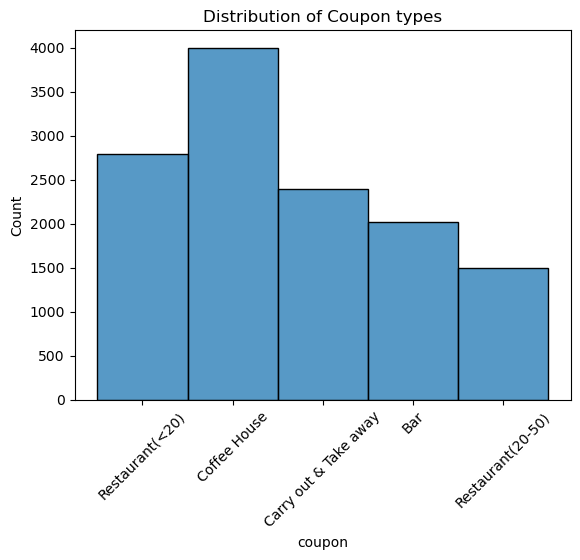

In [17]:
sns.histplot(df, x='coupon')
plt.xticks(rotation=45)
plt.title('Distribution of Coupon types')

Most of the coupons are for a coffee house. Looking at the plot above, the majority of the coupons are for lower cost items.

#### 6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperature at time of coupon')

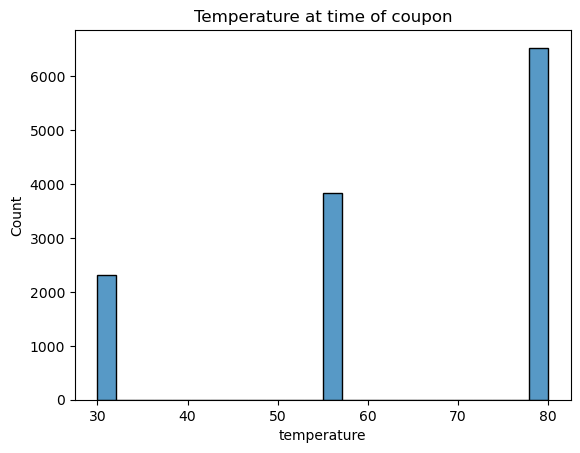

In [18]:
sns.histplot(df, x='temperature')
plt.title('Temperature at time of coupon')

In [102]:
df['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

**Temperature**

Temperature is a numeric column, but there are only 3 temperature values, so despite this being a numeric column, it's actually a categorical variable, like "cold", "warm", "hot".

How does temperature impact acceptance of the coupon?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperature by coupon acceptance')

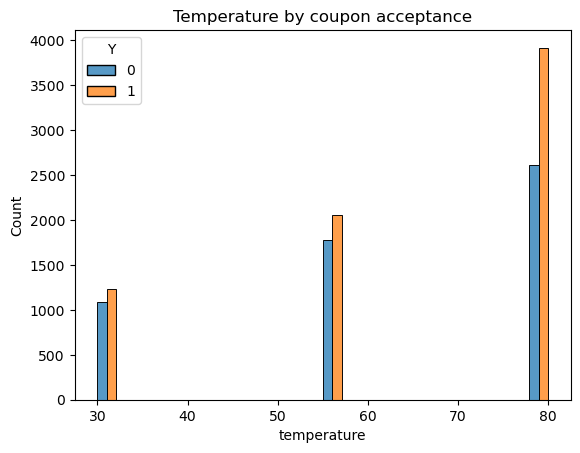

In [23]:
sns.histplot(df, x='temperature', hue='Y', multiple='dodge')
plt.title('Temperature by coupon acceptance')

## REVIEW ABOVE

Based on the above chart, it certainly appears that the warmer the temperature the more likely individuals are to use coupons?  Need to convert these into a ratio to compare.


### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.

In [153]:
df_bar = df.query('coupon == "Bar"')
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      2017 non-null   object
 1   passenger        2017 non-null   object
 2   weather          2017 non-null   object
 3   temperature      2017 non-null   int64 
 4   time             2017 non-null   object
 5   coupon           2017 non-null   object
 6   expiration       2017 non-null   object
 7   gender           2017 non-null   object
 8   age              2017 non-null   int64 
 9   marital_status   2017 non-null   object
 10  has_children     2017 non-null   int64 
 11  education        2017 non-null   object
 12  occupation       2017 non-null   object
 13  income           2017 non-null   object
 14  bar              1996 non-null   object
 15  coffee_house     1978 non-null   object
 16  carry_away       1993 non-null   object
 17  restaurant_20    1994 non-null   obje

#### 2. What proportion of bar coupons were accepted?


In [61]:
prop_bar_yes = (df_bar[df_bar['Y'] == 1].shape[0] / df_bar.shape[0]) * 100
print(f'{round(prop_bar_yes, 2)}% of bar coupons were accepted')

41.0% of bar coupons were accepted


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [154]:
# Drop NA rows so they don't impact rate calculations.
# These are individuals who didn't answer the question as to how often they frequent a bar each month.
df_bar_sub = df_bar.dropna(subset=['bar'])
df_bar_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      1996 non-null   object
 1   passenger        1996 non-null   object
 2   weather          1996 non-null   object
 3   temperature      1996 non-null   int64 
 4   time             1996 non-null   object
 5   coupon           1996 non-null   object
 6   expiration       1996 non-null   object
 7   gender           1996 non-null   object
 8   age              1996 non-null   int64 
 9   marital_status   1996 non-null   object
 10  has_children     1996 non-null   int64 
 11  education        1996 non-null   object
 12  occupation       1996 non-null   object
 13  income           1996 non-null   object
 14  bar              1996 non-null   object
 15  coffee_house     1966 non-null   object
 16  carry_away       1981 non-null   object
 17  restaurant_20    1982 non-null   obje

In [72]:
df_bar_sub['bar'].value_counts()

bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

**BELOW**

The query below shows acceptance values for the answer, 666. Need to get this into a rate!

In [73]:
df_bar_3 = df_bar_sub.query('bar in ("never", "less1", "1~3")')
df_bar_3['Y'].value_counts()

Y
0    1131
1     666
Name: count, dtype: int64

In [74]:
df_bar_4up = df_bar_sub.query('bar in ("4~8", "gt8")')
df_bar_4up['Y'].value_counts()

Y
1    153
0     46
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '33.77%'),
 Text(0, 0, '15.88%'),
 Text(0, 0, '7.01%'),
 Text(0, 0, '0.65%'),
 Text(0, 0, '1.65%')]

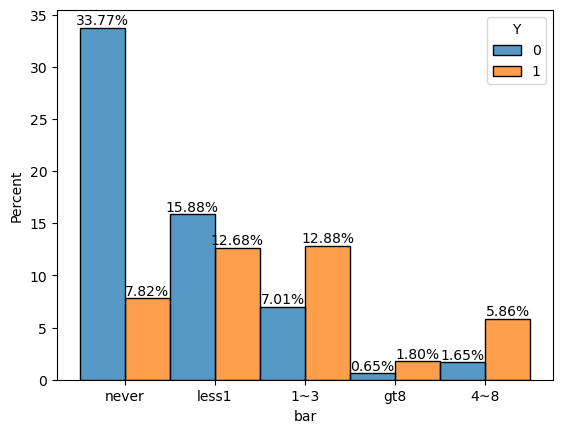

In [75]:
ax = sns.histplot(df_bar_sub, x='bar', hue='Y', multiple='dodge', stat='percent')
ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.bar_label(ax.containers[1], fmt='%.2f%%')

In [129]:
df_bar_sub.isin({'bar': ['never', 'less1', '1~3']})['bar'].value_counts()
#df_bar_sub.isin({'bar': ['4~8', 'gt8']})['bar'].value_counts()

# NOTE: THis gives correct numbers of the 3 or less bar visits!.  The additional colunm may not be necessary?
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

bar
True     1797
False     199
Name: count, dtype: int64

Creating a new column for "going to a bar 3 times or fewer in a month" to easily answer questions based on this group.

In [81]:
df_bar_sub['bar_3_less'] = df_bar_sub.isin({'bar': ['never', 'less1', '1~3']})['bar']

/var/folders/n5/n6rb97jj00v5yg5zqw69hd4c0000gn/T/ipykernel_98359/2912349177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_sub['bar_3_less'] = df_bar_sub.isin({'bar': ['never', 'less1', '1~3']})['bar']


In [85]:
df_bar_sub.bar_3_less.value_counts()

bar_3_less
True     1797
False     199
Name: count, dtype: int64

Looking at the above, 1797 people go to the bar 3 or less times per month, only 199 go more than 3 times per month.

In [137]:
# Acceptance Rate for those that go to the bar 3 times or less per month:
(df_bar_sub.query('bar_3_less == True')['Y'].sum() / df_bar_sub.query('bar_3_less == True').shape[0]) * 100

37.061769616026716

In [138]:
# Acceptance Rate for those that bo to the bar more than 3 times per month:
(df_bar_sub.query('bar_3_less == False')['Y'].sum() / df_bar_sub.query('bar_3_less == False').shape[0]) * 100

76.88442211055276

**ANSWER:**

The acceptance rate of a bar coupon for those who frequent a bar 4 or more times per months is significantly higher at 76.88% when compared to individuals who go to a bar 3 or fewer times per month, of 37.06%.

## REVIEW

do I need this plot?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


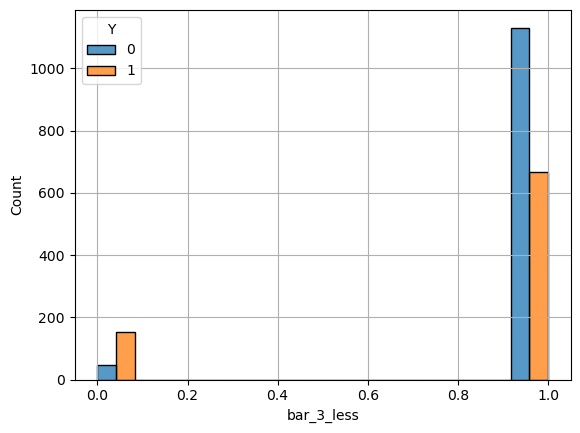

In [112]:
sns.histplot(df_bar_sub, x='bar_3_less', hue='Y', multiple='dodge') #stat='percent')
plt.grid()

## REVIEW

Mapped to numeric values

In [37]:
df_bar['bar'].value_counts()

bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [39]:
bar_map = {
    'never': 0,
    'less1': 1,
    '1~3': 3,
    '4~8': 8,
    'gt8': 10}
df_bar['bar'].replace(to_replace=bar_map, inplace=True)
                      

/var/folders/n5/n6rb97jj00v5yg5zqw69hd4c0000gn/T/ipykernel_98359/3464298525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['bar'].replace(to_replace=bar_map, inplace=True)


In [40]:
df_bar['bar'].value_counts()

bar
0.0     830
1.0     570
3.0     397
8.0     150
10.0     49
Name: count, dtype: int64

In [45]:
x = df_bar[ df_bar['bar'] > 3]
x

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_20,restaurant_50,to_coupon_5min,to_coupon_15min,to_coupon_25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [47]:
y = df_bar.query('bar > 3')
y

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_20,restaurant_50,to_coupon_5min,to_coupon_15min,to_coupon_25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [232]:
df_bar_sub['age'].value_counts()

age
21    416
26    392
31    334
50    281
36    206
41    171
46    109
0      87
Name: count, dtype: int64

In [161]:
df_bar_sub[ df_bar_sub['age'] > 25].shape

(1493, 25)

In [233]:
df_bar_sub['bar'].value_counts()

bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [167]:
df_bar_sub.query('age > 25 and bar == "1~3"').shape

(284, 25)

In [218]:
# Individuals that go to the bar more than once per month and are over the age of 25
df_bar_sub_25 = df_bar_sub.query('age > 25 and bar in ["1~3", "4~8", "gt8"]')
df_bar_sub_25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 112 to 12500
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      420 non-null    object
 1   passenger        420 non-null    object
 2   weather          420 non-null    object
 3   temperature      420 non-null    int64 
 4   time             420 non-null    object
 5   coupon           420 non-null    object
 6   expiration       420 non-null    object
 7   gender           420 non-null    object
 8   age              420 non-null    int64 
 9   marital_status   420 non-null    object
 10  has_children     420 non-null    int64 
 11  education        420 non-null    object
 12  occupation       420 non-null    object
 13  income           420 non-null    object
 14  bar              420 non-null    object
 15  coffee_house     414 non-null    object
 16  carry_away       413 non-null    object
 17  restaurant_20    420 non-null    obj

Sanity check the above query, there should be no ages below 26 and all bar counts 1 or higher.

In [237]:
df_bar_sub_25['age'].value_counts()

age
26    169
31     96
50     67
36     40
41     32
46     16
Name: count, dtype: int64

In [238]:
df_bar_sub_25['bar'].value_counts()

bar
1~3    284
4~8    106
gt8     30
Name: count, dtype: int64

In [219]:
df_bar_sub_25['Y'].value_counts()

Y
1    292
0    128
Name: count, dtype: int64

In [220]:
df_bar_sub.loc[df_bar_sub_25.index]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_20,restaurant_50,to_coupon_5min,to_coupon_15min,to_coupon_25min,direction_same,direction_opp,Y
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1


**How to get the opposite group**

In [223]:
index_set = pd.Index(set(df_bar_sub.index) - set(df_bar_sub_25.index))

In [227]:
df_bar_sub.loc[index_set][['age', 'bar', 'Y']]

,age,bar,Y
4096,21,1~3,1
12288,50,never,0
9,21,never,0
4108,31,never,0
13,21,never,1
...,...,...,...
8163,46,never,0
4071,36,never,0
4086,21,1~3,1
12284,50,never,0


In [231]:
df_bar_sub.loc[index_set][['bar']].value_counts()

bar  
never    830
less1    570
1~3      113
4~8       44
gt8       19
Name: count, dtype: int64

In [239]:
df_bar['bar'].value_counts()

bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [201]:
df.index.difference(df_bar_25.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       12674, 12675, 12676, 12677, 12678, 12679, 12680, 12681, 12682, 12683],
      dtype='int64', length=12264)

In [184]:
df_bar_25.index

Index([  112,   123,   127,   156,   167,   171,   454,   465,   532,   536,
       ...
       12417, 12418, 12421, 12426, 12434, 12481, 12482, 12485, 12488, 12500],
      dtype='int64', length=420)

In [185]:
df.shape

(12684, 25)

In [189]:
df.index

RangeIndex(start=0, stop=12684, step=1)

In [207]:
x = df.index.difference(df_bar_25)
x.values

array([    0,     1,     2, ..., 12681, 12682, 12683])

In [208]:
# df.loc[df.index.difference(my_index),my_feature]
df_bar.loc[df.index.difference(df_bar_25)]

KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 147, 148, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 229, 230, 231, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 294, 295, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 311, 312, 313, 315, 316, 317, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 333, 335, 336, 337, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 353, 354, 355, 357, 358, 359, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 375, 376, 377, 379, 380, 381, 383, 384, 385, 386, 387, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 419, 420, 423, 424, 425, 427, 428, 429, 430, 431, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 444, 445, 446, 448, 449, 450, 451, 452, 453, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 466, 467, 468, 469, 470, 471, 472, 473, 474, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 505, 506, 509, 510, 511, 513, 514, 515, 516, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 533, 534, 535, 537, 538, 539, 541, 542, 543, 544, 545, 546, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 559, 560, 561, 563, 564, 565, 566, 567, 568, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 581, 582, 583, 585, 586, 587, 588, 589, 590, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 603, 604, 605, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622, 623, 625, 626, 627, 629, 630, 631, 632, 633, 634, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 647, 648, 649, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 665, 666, 669, 670, 671, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 687, 688, 689, 691, 692, 693, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 709, 710, 713, 714, 715, 717, 718, 719, 720, 721, 722, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 735, 736, 737, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 753, 754, 757, 758, 759, 761, 762, 763, 764, 765, 766, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 779, 780, 781, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 797, 798, 799, 801, 802, 803, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 819, 820, 821, 823, 824, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 844, 845, 846, 848, 849, 850, 851, 852, 853, 855, 856, 858, 859, 860, 861, 862, 863, 864, 865, 866, 868, 869, 872, 873, 874, 876, 877, 878, 879, 880, 881, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 894, 895, 896, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 912, 913, 914, 916, 917, 918, 920, 921, 922, 923, 924, 925, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 938, 939, 940, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 956, 957, 960, 961, 962, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 978, 979, 980, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 1000, 1001, 1002, 1004, 1005, 1006, 1008, 1009, 1010, 1011, 1012, 1013, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1026, 1027, 1028, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1044, 1045, 1048, 1049, 1050, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1066, 1067, 1070, 1071, 1072, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1089, 1090, 1092, 1093, 1094, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1110, 1111, 1112, 1114, 1115, 1116, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1132, 1133, 1134, 1136, 1137, 1138, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1154, 1155, 1158, 1159, 1160, 1162, 1163, 1164, 1165, 1166, 1167, 1169, 1170, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1182, 1183, 1184, 1186, 1187, 1188, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1204, 1205, 1207, 1208, 1209, 1211, 1212, 1213, 1214, 1215, 1216, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1229, 1230, 1231, 1233, 1234, 1235, 1236, 1237, 1238, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1251, 1252, 1253, 1255, 1256, 1257, 1258, 1259, 1260, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1273, 1274, 1275, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1291, 1292, 1295, 1296, 1297, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1313, 1314, 1317, 1318, 1319, 1321, 1322, 1323, 1324, 1325, 1326, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1340, 1341, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1357, 1358, 1361, 1362, 1363, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1379, 1380, 1383, 1384, 1385, 1387, 1388, 1389, 1390, 1391, 1392, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1405, 1406, 1407, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1423, 1424, 1425, 1427, 1428, 1429, 1431, 1432, 1433, 1434, 1435, 1436, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1449, 1450, 1451, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1471, 1472, 1473, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1489, 1490, 1493, 1494, 1495, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1511, 1512, 1515, 1516, 1517, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1533, 1534, 1535, 1537, 1538, 1539, 1541, 1542, 1543, 1544, 1545, 1546, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1559, 1560, 1561, 1563, 1564, 1565, 1566, 1567, 1568, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1581, 1582, 1583, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1599, 1600, 1601, 1603, 1604, 1605, 1607, 1608, 1609, 1610, 1611, 1612, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1625, 1626, 1627, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1643, 1644, 1645, 1647, 1648, 1649, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1665, 1666, 1667, 1669, 1670, 1671, 1673, 1674, 1675, 1676, 1677, 1678, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1691, 1692, 1693, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1709, 1710, 1711, 1713, 1714, 1715, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1731, 1732, 1735, 1736, 1737, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1757, 1758, 1759, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1775, 1776, 1779, 1780, 1781, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1797, 1798, 1799, 1801, 1802, 1803, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1819, 1820, 1821, 1823, 1824, 1825, 1827, 1828, 1829, 1830, 1831, 1832, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1845, 1846, 1847, 1849, 1850, 1851, 1852, 1853, 1854, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1867, 1868, 1869, 1871, 1872, 1873, 1874, 1875, 1876, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1889, 1890, 1891, 1893, 1894, 1895, 1896, 1897, 1898, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1911, 1912, 1913, 1915, 1916, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1951, 1952, 1953, 1955, 1956, 1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1973, 1974, 1975, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1999, 2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2021, 2022, 2023, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2039, 2040, 2041, 2043, 2044, 2045, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2061, 2062, 2063, 2065, 2066, 2067, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2083, 2084, 2085, 2087, 2088, 2089, 2091, 2092, 2093, 2094, 2095, 2096, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2109, 2110, 2111, 2113, 2114, 2115, 2116, 2117, 2118, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2131, 2132, 2133, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2149, 2150, 2151, 2153, 2154, 2155, 2157, 2158, 2159, 2160, 2161, 2162, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2175, 2176, 2177, 2179, 2180, 2181, 2182, 2183, 2184, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2197, 2198, 2199, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2215, 2216, 2219, 2220, 2221, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2237, 2238, 2241, 2242, 2243, 2245, 2246, 2247, 2248, 2249, 2250, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2263, 2264, 2265, 2267, 2268, 2269, 2270, 2271, 2272, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2285, 2286, 2287, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2303, 2304, 2307, 2308, 2309, 2311, 2312, 2313, 2314, 2315, 2316, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2328, 2329, 2330, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2346, 2347, 2348, 2350, 2351, 2352, 2354, 2355, 2356, 2357, 2358, 2359, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2372, 2373, 2374, 2376, 2377, 2378, 2379, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2396, 2397, 2398, 2400, 2401, 2402, 2404, 2405, 2406, 2407, 2408, 2409, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2422, 2423, 2424, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2440, 2441, 2444, 2445, 2446, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2462, 2463, 2466, 2467, 2468, 2470, 2471, 2472, 2473, 2474, 2475, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2487, 2488, 2490, 2491, 2492, 2493, 2494, 2495, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2508, 2509, 2510, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2526, 2527, 2528, 2530, 2531, 2532, 2534, 2535, 2536, 2537, 2538, 2539, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2552, 2553, 2554, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2570, 2571, 2572, 2574, 2575, 2576, 2578, 2579, 2580, 2581, 2582, 2583, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2596, 2597, 2598, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2614, 2615, 2616, 2618, 2619, 2620, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2635, 2636, 2637, 2639, 2640, 2641, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2657, 2658, 2660, 2661, 2662, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2678, 2679, 2682, 2683, 2684, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2700, 2701, 2702, 2704, 2705, 2706, 2708, 2709, 2710, 2711, 2712, 2713, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2726, 2727, 2728, 2730, 2731, 2732, 2733, 2734, 2735, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2748, 2749, 2750, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2766, 2767, 2768, 2770, 2771, 2772, 2774, 2775, 2776, 2777, 2778, 2779, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2792, 2793, 2794, 2796, 2797, 2798, 2799, 2800, 2801, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2814, 2815, 2816, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2832, 2833, 2834, 2836, 2837, 2838, 2840, 2841, 2842, 2843, 2844, 2845, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2858, 2859, 2860, 2862, 2863, 2864, 2865, 2866, 2867, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2882, 2883, 2884, 2886, 2887, 2888, 2890, 2891, 2892, 2893, 2894, 2895, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2908, 2909, 2910, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2926, 2927, 2928, 2930, 2931, 2932, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2948, 2949, 2950, 2952, 2953, 2954, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2970, 2971, 2972, 2974, 2975, 2976, 2978, 2979, 2980, 2981, 2982, 2983, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2996, 2997, 2998, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3014, 3015, 3016, 3018, 3019, 3020, 3022, 3023, 3024, 3025, 3026, 3027, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3040, 3041, 3042, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3058, 3059, 3060, 3062, 3063, 3064, 3066, 3067, 3068, 3069, 3070, 3071, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3084, 3085, 3086, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3102, 3103, 3104, 3106, 3107, 3108, 3110, 3111, 3112, 3113, 3114, 3115, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3129, 3130, 3131, 3133, 3134, 3135, 3136, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3153, 3154, 3155, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3174, 3175, 3178, 3179, 3180, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3195, 3196, 3199, 3200, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3216, 3217, 3218, 3220, 3221, 3222, 3224, 3225, 3226, 3227, 3228, 3229, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3242, 3243, 3244, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3260, 3261, 3262, 3264, 3265, 3266, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3282, 3283, 3286, 3287, 3288, 3290, 3291, 3292, 3293, 3294, 3295, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3308, 3309, 3310, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3324, 3325, 3326, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3342, 3343, 3344, 3346, 3347, 3348, 3350, 3351, 3352, 3353, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3374, 3375, 3376, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3392, 3393, 3396, 3397, 3398, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3414, 3415, 3418, 3419, 3420, 3422, 3423, 3424, 3425, 3426, 3427, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3440, 3441, 3442, 3444, 3445, 3446, 3447, 3448, 3449, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3462, 3463, 3464, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3480, 3481, 3482, 3484, 3485, 3486, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3502, 3503, 3504, 3506, 3507, 3508, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3524, 3525, 3528, 3529, 3530, 3532, 3533, 3534, 3535, 3536, 3537, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3550, 3551, 3552, 3554, 3555, 3556, 3557, 3558, 3559, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3572, 3573, 3574, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3590, 3591, 3594, 3595, 3596, 3598, 3599, 3600, 3601, 3602, 3603, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3616, 3617, 3618, 3620, 3621, 3622, 3623, 3624, 3625, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3638, 3639, 3640, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3656, 3657, 3658, 3660, 3661, 3662, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3678, 3679, 3682, 3683, 3684, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3700, 3701, 3704, 3705, 3706, 3708, 3709, 3710, 3711, 3712, 3713, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3726, 3727, 3728, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3744, 3745, 3748, 3749, 3750, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3766, 3767, 3768, 3770, 3771, 3772, 3774, 3775, 3776, 3777, 3778, 3779, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3792, 3793, 3794, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3810, 3811, 3814, 3815, 3816, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3832, 3833, 3834, 3836, 3837, 3838, 3840, 3841, 3842, 3843, 3844, 3845, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3858, 3859, 3860, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3876, 3877, 3880, 3881, 3882, 3884, 3885, 3886, 3887, 3888, 3889, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3902, 3903, 3904, 3906, 3907, 3908, 3909, 3910, 3911, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3924, 3925, 3926, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3942, 3943, 3944, 3946, 3947, 3948, 3950, 3951, 3952, 3953, 3954, 3955, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3968, 3969, 3970, 3972, 3973, 3974, 3975, 3976, 3977, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3990, 3991, 3992, 3994, 3995, 3996, 3997, 3999, 4000, 4001, 4002, 4003, 4004, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4065, 4066, 4067, 4068, 4069, 4070, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4109, 4110, 4111, 4112, 4113, 4114, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4196, 4197, 4198, 4199, 4200, 4201, 4202, 4203, 4204, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4524, 4525, 4526, 4527, 4528, 4529, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4546, 4547, 4548, 4549, 4550, 4551, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4678, 4679, 4680, 4681, 4682, 4683, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4700, 4701, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4710, 4711, 4712, 4713, 4714, 4715, 4716, 4717, 4718, 4719, 4720, 4722, 4723, 4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4809, 4810, 4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4875, 4876, 4877, 4878, 4879, 4880, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4897, 4898, 4899, 4900, 4901, 4902, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4919, 4920, 4921, 4922, 4923, 4924, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4976, 4977, 4978, 4979, 4980, 4981, 4982, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5039, 5040, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5172, 5173, 5174, 5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182, 5183, 5184, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5194, 5195, 5196, 5197, 5198, 5199, 5201, 5202, 5203, 5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5213, 5214, 5216, 5217, 5218, 5219, 5220, 5221, 5223, 5224, 5225, 5226, 5227, 5228, 5229, 5230, 5231, 5232, 5233, 5234, 5235, 5236, 5238, 5239, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5260, 5261, 5262, 5263, 5264, 5265, 5267, 5268, 5269, 5270, 5271, 5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5292, 5293, 5294, 5295, 5296, 5297, 5298, 5299, 5300, 5301, 5302, 5304, 5305, 5306, 5307, 5308, 5309, 5310, 5311, 5312, 5314, 5315, 5316, 5317, 5318, 5319, 5320, 5321, 5322, 5323, 5324, 5326, 5327, 5328, 5329, 5330, 5331, 5332, 5333, 5334, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5358, 5359, 5360, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5370, 5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5392, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5402, 5403, 5404, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5428, 5429, 5430, 5431, 5432, 5433, 5434, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5545, 5546, 5547, 5548, 5549, 5550, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5566, 5567, 5568, 5569, 5570, 5571, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619, 5620, 5621, 5622, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5742, 5743, 5744, 5745, 5746, 5747, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5808, 5809, 5810, 5811, 5812, 5813, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5874, 5875, 5876, 5877, 5878, 5879, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5896, 5897, 5898, 5899, 5900, 5901, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5962, 5963, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6148, 6149, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6215, 6216, 6217, 6218, 6219, 6220, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6234, 6235, 6237, 6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6251, 6252, 6253, 6254, 6255, 6256, 6257, 6259, 6260, 6261, 6262, 6263, 6264, 6265, 6266, 6267, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6276, 6277, 6278, 6279, 6281, 6282, 6283, 6284, 6285, 6286, 6287, 6288, 6289, 6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312, 6313, 6314, 6315, 6317, 6318, 6319, 6320, 6321, 6322, 6323, 6325, 6326, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6335, 6336, 6337, 6339, 6340, 6341, 6342, 6343, 6344, 6345, 6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6357, 6358, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367, 6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6379, 6380, 6381, 6382, 6383, 6384, 6386, 6387, 6388, 6389, 6390, 6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6400, 6401, 6402, 6403, 6404, 6405, 6406, 6408, 6409, 6410, 6411, 6412, 6413, 6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424, 6425, 6426, 6427, 6428, 6430, 6431, 6432, 6433, 6434, 6435, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6444, 6445, 6446, 6447, 6448, 6449, 6450, 6452, 6453, 6454, 6455, 6456, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6466, 6467, 6468, 6469, 6470, 6471, 6472, 6474, 6475, 6476, 6477, 6478, 6479, 6480, 6481, 6482, 6483, 6484, 6485, 6486, 6488, 6489, 6490, 6491, 6492, 6493, 6494, 6496, 6497, 6498, 6499, 6500, 6501, 6503, 6504, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6512, 6513, 6514, 6515, 6516, 6518, 6519, 6520, 6521, 6522, 6523, 6524, 6525, 6526, 6527, 6528, 6529, 6530, 6532, 6533, 6534, 6535, 6536, 6537, 6539, 6540, 6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550, 6551, 6553, 6554, 6555, 6556, 6557, 6558, 6559, 6561, 6562, 6563, 6564, 6565, 6566, 6567, 6568, 6569, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6594, 6595, 6596, 6597, 6598, 6600, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6616, 6617, 6618, 6619, 6620, 6622, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6635, 6636, 6637, 6639, 6641, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6654, 6656, 6658, 6659, 6661, 6662, 6664, 6667, 6668, 6669, 6670, 6671, 6672, 6673, 6674, 6675, 6677, 6678, 6679, 6680, 6681, 6683, 6685, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6699, 6700, 6701, 6702, 6703, 6705, 6707, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6724, 6725, 6726, 6727, 6728, 6730, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6743, 6744, 6745, 6746, 6747, 6749, 6751, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6764, 6766, 6768, 6769, 6771, 6772, 6774, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6790, 6791, 6792, 6793, 6794, 6796, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6808, 6810, 6812, 6813, 6815, 6816, 6818, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6834, 6835, 6836, 6837, 6838, 6840, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6851, 6852, 6853, 6854, 6856, 6857, 6858, 6859, 6860, 6862, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6875, 6876, 6877, 6878, 6879, 6881, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6895, 6897, 6899, 6900, 6902, 6903, 6905, 6908, 6909, 6910, 6911, 6912, 6913, 6915, 6916, 6917, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6927, 6928, 6929, 6930, 6931, 6934, 6935, 6936, 6937, 6938, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6959, 6960, 6961, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6971, 6972, 6973, 6974, 6975, 6978, 6979, 6980, 6981, 6982, 6984, 6985, 6986, 6987, 6988, 6989, 6990, 6992, 6993, 6994, 6995, 6996, 6997, 7000, 7001, 7002, 7003, 7004, 7006, 7007, 7008, 7009, 7010, 7011, 7012, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021, 7022, 7023, 7024, 7025, 7026, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7038, 7039, 7040, 7041, 7042, 7043, 7044, 7045, 7047, 7048, 7049, 7051, 7052, 7053, 7054, 7055, 7056, 7057, 7059, 7060, 7061, 7062, 7063, 7064, 7065, 7066, 7067, 7069, 7070, 7071, 7073, 7074, 7075, 7076, 7077, 7078, 7079, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7091, 7092, 7094, 7095, 7096, 7097, 7098, 7099, 7100, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7113, 7114, 7115, 7117, 7118, 7119, 7120, 7121, 7122, 7123, 7125, 7126, 7127, 7128, 7129, 7132, 7133, 7134, 7135, 7136, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7146, 7147, 7148, 7149, 7150, 7151, 7154, 7155, 7156, 7157, 7158, 7160, 7161, 7162, 7163, 7164, 7165, 7166, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7190, 7191, 7192, 7193, 7194, 7195, 7198, 7199, 7200, 7201, 7202, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7212, 7213, 7214, 7215, 7216, 7217, 7220, 7221, 7222, 7223, 7224, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7234, 7235, 7236, 7237, 7238, 7239, 7242, 7243, 7244, 7245, 7246, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7267, 7268, 7269, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7289, 7290, 7291, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7322, 7323, 7324, 7325, 7326, 7327, 7330, 7331, 7332, 7333, 7334, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351, 7352, 7353, 7355, 7356, 7357, 7359, 7360, 7361, 7362, 7363, 7364, 7365, 7367, 7368, 7369, 7370, 7371, 7372, 7373, 7374, 7375, 7377, 7378, 7379, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7389, 7390, 7391, 7392, 7393, 7396, 7397, 7398, 7399, 7400, 7402, 7403, 7404, 7405, 7406, 7407, 7408, 7410, 7411, 7412, 7413, 7414, 7415, 7416, 7417, 7418, 7419, 7420, 7421, 7422, 7424, 7425, 7426, 7427, 7428, 7429, 7430, 7432, 7433, 7434, 7435, 7436, 7437, 7440, 7441, 7442, 7443, 7444, 7446, 7447, 7448, 7449, 7450, 7451, 7452, 7454, 7455, 7456, 7457, 7458, 7459, 7462, 7463, 7464, 7465, 7466, 7468, 7469, 7470, 7471, 7472, 7473, 7474, 7476, 7477, 7478, 7479, 7480, 7481, 7482, 7483, 7484, 7485, 7486, 7487, 7488, 7490, 7491, 7492, 7493, 7494, 7495, 7496, 7498, 7499, 7500, 7501, 7502, 7503, 7506, 7507, 7508, 7509, 7510, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7520, 7521, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7531, 7532, 7534, 7535, 7536, 7537, 7539, 7540, 7541, 7542, 7543, 7544, 7545, 7546, 7547, 7549, 7550, 7551, 7552, 7553, 7554, 7557, 7558, 7559, 7560, 7561, 7562, 7563, 7564, 7566, 7567, 7568, 7570, 7571, 7572, 7573, 7574, 7575, 7576, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7585, 7586, 7588, 7589, 7590, 7591, 7592, 7593, 7595, 7596, 7597, 7598, 7599, 7602, 7603, 7604, 7605, 7606, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 7616, 7617, 7618, 7619, 7620, 7621, 7622, 7623, 7624, 7625, 7627, 7628, 7629, 7631, 7632, 7633, 7634, 7635, 7636, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7645, 7647, 7648, 7649, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7659, 7660, 7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670, 7672, 7673, 7674, 7675, 7676, 7677, 7678, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7691, 7692, 7693, 7695, 7696, 7697, 7698, 7699, 7700, 7701, 7703, 7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7724, 7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7735, 7736, 7737, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7747, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7757, 7758, 7759, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799, 7801, 7802, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7821, 7822, 7823, 7825, 7826, 7827, 7828, 7829, 7830, 7831, 7833, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7844, 7845, 7846, 7848, 7849, 7850, 7851, 7852, 7853, 7854, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7867, 7869, 7870, 7871, 7872, 7873, 7874, 7875, 7877, 7878, 7879, 7880, 7881, 7882, 7885, 7886, 7887, 7888, 7889, 7891, 7892, 7893, 7894, 7895, 7896, 7897, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7910, 7911, 7912, 7914, 7915, 7916, 7917, 7918, 7919, 7920, 7922, 7923, 7924, 7925, 7926, 7927, 7928, 7929, 7930, 7931, 7932, 7933, 7935, 7936, 7937, 7938, 7939, 7940, 7941, 7943, 7944, 7945, 7946, 7947, 7948, 7951, 7952, 7953, 7954, 7955, 7957, 7958, 7959, 7960, 7961, 7962, 7963, 7965, 7966, 7967, 7968, 7969, 7970, 7973, 7974, 7975, 7976, 7977, 7979, 7980, 7981, 7982, 7983, 7984, 7985, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 7994, 7995, 7996, 7998, 7999, 8000, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8031, 8032, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8043, 8045, 8046, 8047, 8048, 8049, 8050, 8051, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8060, 8061, 8062, 8063, 8064, 8065, 8067, 8068, 8069, 8070, 8071, 8072, 8073, 8075, 8076, 8077, 8078, 8079, 8080, 8083, 8084, 8085, 8086, 8087, 8089, 8090, 8091, 8092, 8093, 8094, 8095, 8097, 8098, 8099, 8100, 8101, 8102, 8105, 8106, 8107, 8108, 8109, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8133, 8134, 8135, 8136, 8137, 8138, 8139, 8141, 8142, 8143, 8144, 8145, 8146, 8147, 8148, 8149, 8150, 8152, 8153, 8154, 8156, 8157, 8158, 8159, 8160, 8161, 8162, 8164, 8165, 8166, 8167, 8168, 8169, 8170, 8171, 8173, 8174, 8175, 8177, 8178, 8179, 8180, 8181, 8182, 8183, 8185, 8186, 8187, 8188, 8189, 8192, 8193, 8194, 8195, 8196, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8206, 8207, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8228, 8229, 8230, 8231, 8232, 8233, 8236, 8237, 8238, 8239, 8240, 8242, 8243, 8244, 8245, 8246, 8247, 8248, 8250, 8251, 8252, 8253, 8254, 8255, 8258, 8259, 8260, 8261, 8262, 8264, 8265, 8266, 8267, 8268, 8269, 8270, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8282, 8283, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8293, 8294, 8295, 8296, 8297, 8298, 8299, 8300, 8301, 8302, 8304, 8305, 8306, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8316, 8317, 8318, 8319, 8320, 8323, 8324, 8325, 8326, 8327, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8348, 8349, 8350, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8360, 8361, 8362, 8363, 8364, 8367, 8368, 8369, 8370, 8371, 8373, 8374, 8375, 8376, 8377, 8378, 8379, 8381, 8382, 8383, 8384, 8385, 8386, 8387, 8388, 8389, 8390, 8391, 8392, 8393, 8395, 8396, 8397, 8398, 8399, 8400, 8401, 8403, 8404, 8405, 8406, 8407, 8408, 8409, 8410, 8411, 8412, 8414, 8415, 8416, 8418, 8419, 8420, 8421, 8422, 8423, 8424, 8426, 8427, 8428, 8429, 8430, 8433, 8434, 8435, 8436, 8437, 8439, 8440, 8441, 8442, 8443, 8444, 8446, 8447, 8448, 8449, 8450, 8451, 8454, 8455, 8456, 8457, 8458, 8460, 8461, 8462, 8463, 8464, 8465, 8466, 8468, 8469, 8470, 8471, 8472, 8473, 8474, 8475, 8476, 8477, 8478, 8479, 8480, 8482, 8483, 8484, 8485, 8486, 8487, 8488, 8490, 8491, 8492, 8493, 8494, 8495, 8498, 8499, 8500, 8501, 8502, 8504, 8505, 8506, 8507, 8508, 8509, 8510, 8512, 8513, 8514, 8515, 8516, 8517, 8520, 8521, 8522, 8523, 8524, 8526, 8527, 8528, 8529, 8530, 8531, 8532, 8534, 8535, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8543, 8545, 8546, 8547, 8549, 8550, 8551, 8552, 8553, 8554, 8555, 8557, 8558, 8559, 8560, 8561, 8564, 8565, 8566, 8567, 8568, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8601, 8602, 8603, 8604, 8605, 8608, 8609, 8610, 8611, 8612, 8614, 8615, 8616, 8617, 8618, 8619, 8620, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8633, 8634, 8635, 8637, 8638, 8639, 8640, 8641, 8642, 8643, 8645, 8646, 8647, 8648, 8649, 8650, 8651, 8652, 8653, 8654, 8655, 8656, 8658, 8659, 8660, 8661, 8662, 8663, 8664, 8666, 8667, 8668, 8669, 8670, 8671, 8672, 8673, 8674, 8675, 8676, 8677, 8678, 8680, 8681, 8682, 8683, 8684, 8685, 8686, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8699, 8700, 8701, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8721, 8722, 8723, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8733, 8734, 8735, 8736, 8737, 8740, 8741, 8742, 8743, 8744, 8746, 8747, 8748, 8749, 8750, 8751, 8752, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8765, 8766, 8767, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8786, 8787, 8788, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8798, 8799, 8800, 8801, 8802, 8805, 8806, 8807, 8808, 8809, 8811, 8812, 8813, 8814, 8815, 8816, 8817, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8826, 8827, 8829, 8831, 8832, 8833, 8835, 8837, 8838, 8839, 8841, 8842, 8843, 8845, 8846, 8847, 8848, 8849, 8851, 8852, 8853, 8854, 8855, 8856, 8858, 8859, 8861, 8862, 8864, 8865, 8867, 8868, 8869, 8870, 8871, 8872, 8873, 8874, 8875, 8877, 8878, 8879, 8880, 8882, 8883, 8885, 8886, 8887, 8889, 8890, 8891, 8892, 8893, 8895, 8897, 8898, 8899, 8901, 8903, 8904, 8905, 8907, 8908, 8909, 8911, 8912, 8913, 8914, 8915, 8916, 8917, 8918, 8919, 8921, 8922, 8923, 8924, 8926, 8927, 8929, 8930, 8931, 8933, 8934, 8935, 8936, 8937, 8939, 8940, 8941, 8942, 8943, 8944, 8946, 8947, 8949, 8950, 8952, 8953, 8955, 8956, 8957, 8958, 8959, 8961, 8962, 8963, 8964, 8965, 8966, 8968, 8969, 8971, 8972, 8974, 8975, 8977, 8978, 8979, 8980, 8981, 8983, 8984, 8985, 8986, 8987, 8988, 8990, 8991, 8993, 8994, 8996, 8997, 8999, 9000, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9009, 9010, 9011, 9012, 9014, 9015, 9017, 9018, 9019, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9031, 9032, 9033, 9034, 9036, 9037, 9039, 9040, 9041, 9043, 9044, 9045, 9046, 9047, 9049, 9050, 9051, 9052, 9053, 9054, 9056, 9057, 9059, 9060, 9062, 9063, 9065, 9066, 9067, 9068, 9069, 9071, 9072, 9073, 9074, 9075, 9076, 9078, 9079, 9081, 9082, 9084, 9085, 9087, 9088, 9089, 9090, 9091, 9093, 9094, 9095, 9096, 9097, 9098, 9100, 9101, 9103, 9104, 9106, 9107, 9109, 9110, 9111, 9112, 9113, 9115, 9117, 9118, 9119, 9120, 9121, 9122, 9124, 9125, 9127, 9129, 9130, 9131, 9133, 9134, 9135, 9137, 9138, 9139, 9140, 9141, 9142, 9143, 9144, 9145, 9147, 9148, 9149, 9150, 9152, 9153, 9155, 9156, 9157, 9159, 9160, 9161, 9162, 9163, 9164, 9165, 9166, 9167, 9169, 9170, 9171, 9172, 9174, 9175, 9177, 9178, 9179, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9191, 9192, 9193, 9194, 9196, 9197, 9199, 9200, 9201, 9203, 9204, 9205, 9206, 9207, 9209, 9211, 9212, 9213, 9215, 9217, 9218, 9219, 9221, 9222, 9223, 9225, 9226, 9227, 9228, 9229, 9231, 9233, 9234, 9235, 9237, 9239, 9240, 9241, 9243, 9244, 9245, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254, 9255, 9257, 9258, 9259, 9260, 9262, 9263, 9265, 9266, 9267, 9269, 9270, 9271, 9272, 9273, 9275, 9277, 9278, 9279, 9281, 9283, 9284, 9285, 9287, 9288, 9289, 9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9301, 9302, 9303, 9304, 9306, 9307, 9309, 9310, 9311, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9323, 9324, 9325, 9326, 9328, 9329, 9331, 9332, 9333, 9335, 9336, 9337, 9338, 9339, 9340, 9341, 9342, 9343, 9345, 9346, 9347, 9348, 9350, 9351, 9353, 9354, 9355, 9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9367, 9368, 9369, 9370, 9372, 9373, 9375, 9376, 9377, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9389, 9390, 9391, 9392, 9394, 9395, 9397, 9398, 9399, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9411, 9412, 9413, 9414, 9416, 9417, 9419, 9420, 9421, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9433, 9434, 9435, 9436, 9438, 9439, 9441, 9442, 9443, 9445, 9446, 9447, 9448, 9449, 9451, 9452, 9453, 9454, 9456, 9458, 9459, 9461, 9462, 9463, 9465, 9466, 9467, 9468, 9469, 9471, 9472, 9473, 9474, 9475, 9476, 9478, 9479, 9481, 9482, 9484, 9485, 9487, 9488, 9489, 9490, 9491, 9492, 9493, 9494, 9495, 9497, 9498, 9499, 9500, 9502, 9503, 9505, 9506, 9507, 9509, 9510, 9511, 9512, 9513, 9515, 9517, 9518, 9519, 9521, 9523, 9524, 9525, 9527, 9528, 9529, 9531, 9532, 9533, 9534, 9535, 9537, 9539, 9540, 9541, 9543, 9545, 9546, 9547, 9549, 9550, 9551, 9553, 9554, 9555, 9556, 9557, 9559, 9560, 9561, 9562, 9563, 9564, 9566, 9567, 9569, 9570, 9572, 9573, 9575, 9576, 9577, 9578, 9579, 9581, 9582, 9583, 9584, 9585, 9586, 9588, 9589, 9591, 9592, 9594, 9595, 9597, 9598, 9599, 9600, 9601, 9603, 9605, 9606, 9607, 9609, 9611, 9612, 9613, 9615, 9616, 9617, 9619, 9620, 9621, 9622, 9623, 9624, 9625, 9626, 9627, 9629, 9630, 9631, 9632, 9634, 9635, 9637, 9638, 9639, 9641, 9642, 9643, 9644, 9645, 9646, 9647, 9648, 9649, 9651, 9652, 9653, 9654, 9656, 9657, 9659, 9660, 9661, 9663, 9664, 9665, 9666, 9667, 9668, 9669, 9670, 9671, 9673, 9674, 9675, 9676, 9678, 9680, 9681, 9682, 9684, 9685, 9686, 9687, 9688, 9690, 9692, 9693, 9694, 9696, 9698, 9699, 9700, 9702, 9703, 9704, 9706, 9707, 9708, 9709, 9710, 9711, 9712, 9713, 9714, 9716, 9717, 9718, 9719, 9721, 9722, 9724, 9725, 9726, 9727, 9729, 9730, 9731, 9732, 9733, 9734, 9735, 9736, 9738, 9739, 9740, 9741, 9743, 9744, 9746, 9747, 9748, 9750, 9751, 9752, 9753, 9754, 9756, 9757, 9758, 9759, 9760, 9761, 9763, 9764, 9766, 9767, 9769, 9770, 9772, 9773, 9774, 9775, 9776, 9777, 9778, 9779, 9780, 9782, 9783, 9784, 9785, 9787, 9788, 9790, 9791, 9792, 9794, 9795, 9796, 9797, 9799, 9801, 9803, 9805, 9806, 9808, 9809, 9811, 9812, 9813, 9814, 9815, 9817, 9819, 9820, 9821, 9823, 9825, 9826, 9827, 9829, 9830, 9831, 9833, 9834, 9835, 9836, 9837, 9839, 9841, 9842, 9843, 9845, 9847, 9848, 9849, 9851, 9852, 9853, 9855, 9856, 9857, 9858, 9859, 9860, 9861, 9862, 9863, 9865, 9866, 9867, 9868, 9870, 9871, 9873, 9874, 9875, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9887, 9888, 9889, 9890, 9892, 9893, 9895, 9896, 9897, 9899, 9900, 9901, 9902, 9903, 9905, 9907, 9908, 9909, 9911, 9913, 9914, 9915, 9917, 9918, 9919, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9931, 9932, 9933, 9934, 9936, 9937, 9939, 9940, 9941, 9943, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9953, 9954, 9955, 9956, 9958, 9959, 9961, 9962, 9963, 9965, 9966, 9967, 9968, 9969, 9971, 9973, 9974, 9975, 9977, 9979, 9980, 9981, 9983, 9984, 9985, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9997, 9998, 9999, 10000, 10002, 10003, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10019, 10020, 10021, 10022, 10024, 10025, 10027, 10028, 10029, 10031, 10032, 10033, 10034, 10035, 10037, 10039, 10040, 10041, 10043, 10045, 10046, 10047, 10049, 10050, 10051, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10060, 10061, 10063, 10064, 10065, 10066, 10068, 10069, 10071, 10072, 10073, 10075, 10076, 10077, 10078, 10079, 10080, 10081, 10082, 10083, 10085, 10086, 10087, 10088, 10090, 10091, 10093, 10094, 10095, 10097, 10098, 10099, 10100, 10101, 10103, 10104, 10105, 10106, 10107, 10108, 10110, 10111, 10113, 10114, 10116, 10117, 10119, 10120, 10121, 10122, 10123, 10125, 10127, 10128, 10129, 10131, 10133, 10134, 10135, 10137, 10138, 10139, 10141, 10142, 10143, 10144, 10145, 10147, 10149, 10150, 10151, 10153, 10155, 10156, 10157, 10159, 10160, 10161, 10163, 10164, 10165, 10166, 10167, 10169, 10170, 10171, 10172, 10173, 10174, 10176, 10177, 10179, 10180, 10182, 10183, 10185, 10186, 10187, 10188, 10189, 10190, 10191, 10193, 10194, 10195, 10196, 10198, 10199, 10201, 10202, 10203, 10205, 10206, 10207, 10208, 10209, 10211, 10213, 10214, 10215, 10217, 10219, 10220, 10221, 10223, 10224, 10225, 10227, 10228, 10229, 10230, 10231, 10233, 10235, 10236, 10237, 10239, 10241, 10242, 10243, 10245, 10246, 10247, 10249, 10250, 10251, 10252, 10253, 10255, 10256, 10257, 10258, 10259, 10260, 10262, 10263, 10265, 10266, 10268, 10269, 10271, 10272, 10273, 10274, 10275, 10276, 10277, 10278, 10279, 10281, 10282, 10283, 10284, 10286, 10287, 10289, 10290, 10291, 10293, 10294, 10295, 10296, 10297, 10299, 10300, 10301, 10302, 10303, 10304, 10306, 10307, 10309, 10310, 10312, 10313, 10315, 10316, 10317, 10318, 10319, 10321, 10322, 10323, 10324, 10325, 10326, 10328, 10329, 10331, 10332, 10334, 10335, 10337, 10338, 10339, 10340, 10341, 10342, 10343, 10344, 10345, 10347, 10348, 10349, 10350, 10352, 10353, 10355, 10356, 10357, 10359, 10360, 10361, 10362, 10363, 10365, 10367, 10368, 10369, 10371, 10373, 10374, 10375, 10377, 10378, 10379, 10381, 10382, 10383, 10384, 10385, 10387, 10388, 10389, 10390, 10391, 10392, 10394, 10395, 10397, 10398, 10400, 10401, 10403, 10404, 10405, 10406, 10408, 10410, 10411, 10412, 10414, 10416, 10417, 10418, 10420, 10421, 10422, 10424, 10425, 10426, 10427, 10428, 10429, 10430, 10431, 10432, 10434, 10435, 10436, 10437, 10439, 10440, 10442, 10443, 10444, 10446, 10447, 10448, 10449, 10450, 10452, 10453, 10454, 10455, 10456, 10457, 10459, 10460, 10462, 10463, 10465, 10466, 10468, 10469, 10470, 10471, 10472, 10474, 10475, 10476, 10478, 10479, 10481, 10482, 10483, 10485, 10486, 10487, 10488, 10489, 10490, 10491, 10492, 10493, 10495, 10496, 10497, 10498, 10500, 10501, 10503, 10504, 10505, 10507, 10508, 10509, 10510, 10511, 10513, 10514, 10515, 10516, 10517, 10518, 10520, 10521, 10523, 10524, 10526, 10527, 10529, 10530, 10531, 10532, 10533, 10535, 10536, 10537, 10538, 10540, 10541, 10543, 10544, 10546, 10547, 10548, 10549, 10550, 10551, 10552, 10553, 10554, 10556, 10557, 10558, 10559, 10561, 10562, 10564, 10565, 10566, 10568, 10569, 10570, 10571, 10572, 10574, 10575, 10576, 10577, 10578, 10579, 10581, 10582, 10584, 10585, 10587, 10588, 10590, 10591, 10592, 10593, 10594, 10595, 10597, 10598, 10599, 10600, 10601, 10602, 10603, 10604, 10606, 10607, 10608, 10609, 10611, 10612, 10614, 10615, 10616, 10618, 10619, 10620, 10621, 10622, 10623, 10624, 10625, 10626, 10628, 10629, 10630, 10631, 10633, 10634, 10636, 10637, 10638, 10640, 10641, 10642, 10643, 10644, 10646, 10648, 10649, 10650, 10652, 10654, 10655, 10656, 10658, 10659, 10660, 10662, 10663, 10664, 10665, 10666, 10668, 10669, 10670, 10671, 10672, 10673, 10675, 10676, 10678, 10679, 10681, 10682, 10684, 10685, 10686, 10687, 10689, 10690, 10691, 10692, 10694, 10695, 10697, 10698, 10700, 10701, 10702, 10703, 10704, 10706, 10707, 10708, 10709, 10710, 10711, 10713, 10714, 10716, 10717, 10719, 10720, 10722, 10723, 10724, 10725, 10726, 10728, 10729, 10730, 10731, 10733, 10734, 10736, 10737, 10739, 10740, 10741, 10742, 10743, 10745, 10746, 10747, 10748, 10749, 10750, 10751, 10753, 10754, 10755, 10756, 10757, 10759, 10761, 10762, 10763, 10765, 10767, 10768, 10769, 10771, 10772, 10773, 10775, 10776, 10779, 10780, 10782, 10783, 10784, 10785, 10786, 10787, 10788, 10789, 10790, 10791, 10792, 10793, 10794, 10795, 10797, 10798, 10801, 10802, 10804, 10805, 10806, 10807, 10808, 10809, 10810, 10811, 10812, 10813, 10814, 10815, 10816, 10817, 10819, 10820, 10822, 10823, 10824, 10825, 10826, 10829, 10830, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839, 10840, 10841, 10842, 10843, 10844, 10845, 10847, 10848, 10850, 10853, 10854, 10856, 10857, 10858, 10859, 10861, 10862, 10863, 10864, 10866, 10867, 10868, 10869, 10870, 10871, 10872, 10873, 10874, 10875, 10876, 10877, 10878, 10879, 10881, 10882, 10885, 10886, 10888, 10889, 10891, 10892, 10893, 10894, 10895, 10896, 10897, 10898, 10899, 10900, 10901, 10903, 10904, 10907, 10908, 10910, 10911, 10913, 10914, 10915, 10916, 10917, 10918, 10919, 10920, 10921, 10922, 10923, 10925, 10926, 10928, 10931, 10932, 10934, 10935, 10936, 10937, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10947, 10948, 10950, 10953, 10954, 10956, 10957, 10958, 10959, 10961, 10962, 10963, 10964, 10965, 10966, 10967, 10969, 10970, 10973, 10974, 10976, 10977, 10978, 10979, 10980, 10981, 10982, 10983, 10984, 10985, 10986, 10987, 10988, 10989, 10991, 10992, 10995, 10996, 10998, 10999, 11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11009, 11010, 11011, 11013, 11014, 11017, 11018, 11020, 11021, 11022, 11023, 11024, 11025, 11026, 11027, 11028, 11029, 11030, 11031, 11032, 11033, 11035, 11036, 11039, 11040, 11042, 11043, 11044, 11045, 11046, 11047, 11048, 11049, 11050, 11051, 11052, 11053, 11054, 11055, 11057, 11058, 11060, 11063, 11064, 11066, 11067, 11068, 11069, 11071, 11072, 11073, 11074, 11075, 11076, 11077, 11079, 11080, 11083, 11084, 11086, 11087, 11088, 11089, 11090, 11091, 11092, 11093, 11094, 11095, 11096, 11097, 11098, 11099, 11101, 11102, 11105, 11106, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119, 11120, 11121, 11123, 11124, 11127, 11128, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11143, 11145, 11146, 11148, 11151, 11152, 11154, 11155, 11156, 11157, 11159, 11160, 11161, 11162, 11163, 11164, 11165, 11167, 11168, 11171, 11172, 11174, 11175, 11176, 11177, 11178, 11179, 11180, 11181, 11182, 11183, 11184, 11185, 11186, 11187, 11189, 11190, 11193, 11194, 11196, 11197, 11198, 11199, 11200, 11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11211, 11212, 11215, 11216, 11218, 11219, 11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229, 11230, 11231, 11233, 11234, 11236, 11239, 11240, 11242, 11243, 11244, 11245, 11247, 11248, 11249, 11250, 11251, 11252, 11253, 11255, 11256, 11259, 11260, 11262, 11263, 11264, 11265, 11266, 11267, 11268, 11269, 11270, 11271, 11272, 11273, 11274, 11275, 11277, 11278, 11281, 11282, 11284, 11285, 11286, 11287, 11288, 11289, 11290, 11291, 11292, 11293, 11294, 11295, 11296, 11297, 11299, 11300, 11303, 11304, 11306, 11307, 11309, 11310, 11311, 11312, 11313, 11314, 11315, 11316, 11317, 11318, 11319, 11321, 11322, 11325, 11326, 11328, 11329, 11330, 11331, 11332, 11333, 11334, 11335, 11336, 11337, 11338, 11339, 11340, 11341, 11343, 11344, 11347, 11348, 11350, 11351, 11352, 11353, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11365, 11366, 11368, 11371, 11372, 11374, 11375, 11376, 11377, 11379, 11380, 11381, 11382, 11383, 11384, 11385, 11387, 11388, 11391, 11392, 11394, 11395, 11397, 11398, 11399, 11400, 11401, 11402, 11403, 11404, 11405, 11406, 11407, 11409, 11410, 11413, 11414, 11416, 11417, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427, 11428, 11429, 11431, 11432, 11435, 11436, 11438, 11439, 11441, 11442, 11443, 11444, 11445, 11446, 11447, 11448, 11449, 11450, 11451, 11453, 11454, 11456, 11459, 11460, 11462, 11463, 11464, 11466, 11467, 11468, 11469, 11470, 11471, 11472, 11474, 11475, 11478, 11479, 11481, 11482, 11484, 11485, 11486, 11487, 11488, 11489, 11490, 11491, 11492, 11493, 11494, 11496, 11497, 11500, 11501, 11503, 11504, 11505, 11506, 11507, 11508, 11509, 11510, 11511, 11512, 11513, 11514, 11515, 11516, 11518, 11519, 11522, 11523, 11525, 11526, 11527, 11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11536, 11537, 11538, 11540, 11541, 11543, 11544, 11545, 11547, 11549, 11552, 11553, 11555, 11556, 11557, 11558, 11560, 11561, 11562, 11563, 11564, 11565, 11566, 11568, 11569, 11572, 11573, 11575, 11576, 11578, 11579, 11580, 11581, 11582, 11583, 11584, 11585, 11586, 11587, 11588, 11590, 11591, 11594, 11595, 11597, 11598, 11599, 11600, 11601, 11602, 11603, 11604, 11605, 11606, 11607, 11608, 11609, 11610, 11612, 11613, 11615, 11618, 11619, 11621, 11622, 11623, 11624, 11626, 11627, 11628, 11629, 11630, 11631, 11632, 11634, 11635, 11638, 11639, 11641, 11642, 11643, 11644, 11645, 11646, 11647, 11648, 11649, 11650, 11651, 11652, 11653, 11655, 11656, 11658, 11661, 11662, 11664, 11665, 11666, 11667, 11669, 11670, 11671, 11672, 11674, 11675, 11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684, 11685, 11686, 11687, 11689, 11690, 11692, 11695, 11696, 11698, 11699, 11700, 11701, 11703, 11704, 11705, 11706, 11707, 11708, 11709, 11710, 11712, 11713, 11716, 11717, 11719, 11720, 11721, 11722, 11723, 11724, 11725, 11726, 11727, 11728, 11729, 11730, 11731, 11732, 11734, 11735, 11738, 11739, 11741, 11742, 11744, 11745, 11746, 11747, 11748, 11749, 11750, 11751, 11752, 11753, 11754, 11756, 11757, 11760, 11761, 11763, 11764, 11765, 11766, 11767, 11768, 11769, 11770, 11771, 11772, 11773, 11774, 11775, 11776, 11778, 11779, 11781, 11784, 11785, 11787, 11788, 11789, 11790, 11792, 11793, 11794, 11795, 11796, 11797, 11798, 11800, 11801, 11803, 11806, 11807, 11809, 11810, 11811, 11812, 11814, 11815, 11816, 11817, 11818, 11819, 11820, 11822, 11823, 11826, 11827, 11829, 11830, 11832, 11833, 11834, 11835, 11836, 11837, 11838, 11839, 11840, 11841, 11842, 11844, 11845, 11848, 11849, 11851, 11852, 11854, 11855, 11856, 11857, 11858, 11859, 11860, 11861, 11862, 11863, 11864, 11866, 11867, 11869, 11872, 11873, 11875, 11876, 11877, 11878, 11880, 11881, 11882, 11883, 11884, 11885, 11886, 11888, 11889, 11892, 11893, 11895, 11896, 11897, 11898, 11899, 11900, 11901, 11902, 11903, 11904, 11905, 11906, 11907, 11908, 11910, 11911, 11914, 11915, 11917, 11918, 11919, 11920, 11921, 11922, 11923, 11924, 11925, 11926, 11927, 11928, 11929, 11931, 11932, 11935, 11936, 11938, 11939, 11941, 11942, 11943, 11944, 11945, 11946, 11947, 11948, 11949, 11950, 11951, 11953, 11954, 11956, 11959, 11960, 11962, 11963, 11964, 11965, 11967, 11968, 11969, 11970, 11971, 11972, 11973, 11975, 11976, 11978, 11981, 11982, 11984, 11985, 11986, 11987, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11997, 11998, 12001, 12002, 12004, 12005, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12019, 12020, 12023, 12024, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12041, 12042, 12044, 12047, 12048, 12050, 12051, 12052, 12053, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12063, 12064, 12066, 12069, 12070, 12072, 12073, 12074, 12075, 12077, 12078, 12079, 12080, 12081, 12082, 12083, 12085, 12086, 12089, 12090, 12092, 12093, 12095, 12096, 12097, 12098, 12099, 12100, 12101, 12102, 12103, 12104, 12105, 12107, 12108, 12111, 12112, 12114, 12115, 12117, 12118, 12119, 12120, 12121, 12122, 12123, 12124, 12125, 12126, 12127, 12129, 12130, 12133, 12134, 12136, 12137, 12139, 12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148, 12149, 12151, 12152, 12155, 12156, 12158, 12159, 12160, 12161, 12162, 12163, 12164, 12165, 12166, 12167, 12168, 12169, 12170, 12172, 12173, 12176, 12177, 12179, 12180, 12181, 12182, 12183, 12184, 12185, 12186, 12187, 12188, 12189, 12190, 12191, 12192, 12194, 12195, 12197, 12200, 12201, 12203, 12204, 12205, 12206, 12208, 12209, 12210, 12211, 12212, 12213, 12214, 12216, 12217, 12220, 12221, 12223, 12224, 12226, 12227, 12228, 12229, 12230, 12231, 12232, 12233, 12234, 12235, 12236, 12238, 12239, 12242, 12243, 12245, 12246, 12248, 12249, 12250, 12251, 12252, 12253, 12254, 12255, 12256, 12257, 12258, 12260, 12261, 12264, 12265, 12267, 12268, 12269, 12270, 12271, 12272, 12273, 12274, 12275, 12276, 12277, 12278, 12279, 12280, 12282, 12283, 12286, 12287, 12289, 12290, 12291, 12292, 12293, 12294, 12295, 12296, 12297, 12298, 12299, 12300, 12301, 12302, 12304, 12305, 12308, 12309, 12311, 12312, 12314, 12315, 12316, 12317, 12318, 12319, 12320, 12321, 12322, 12323, 12324, 12326, 12327, 12329, 12332, 12333, 12335, 12336, 12337, 12339, 12340, 12341, 12342, 12343, 12344, 12345, 12347, 12348, 12351, 12352, 12354, 12355, 12356, 12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366, 12367, 12369, 12370, 12373, 12374, 12376, 12377, 12378, 12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387, 12388, 12389, 12391, 12392, 12394, 12397, 12398, 12400, 12401, 12402, 12403, 12405, 12406, 12407, 12408, 12409, 12410, 12411, 12413, 12414, 12416, 12419, 12420, 12422, 12423, 12424, 12425, 12427, 12428, 12429, 12430, 12431, 12432, 12433, 12435, 12436, 12438, 12441, 12442, 12444, 12445, 12446, 12447, 12449, 12450, 12451, 12452, 12453, 12454, 12455, 12457, 12458, 12461, 12462, 12464, 12465, 12466, 12467, 12468, 12469, 12470, 12471, 12472, 12473, 12474, 12475, 12476, 12477, 12479, 12480, 12483, 12484, 12486, 12487, 12489, 12490, 12491, 12492, 12493, 12494, 12495, 12496, 12497, 12498, 12499, 12501, 12502, 12505, 12506, 12508, 12509, 12511, 12512, 12513, 12514, 12515, 12516, 12517, 12518, 12519, 12520, 12521, 12523, 12524, 12527, 12528, 12530, 12531, 12532, 12533, 12534, 12535, 12536, 12537, 12538, 12539, 12540, 12541, 12542, 12543, 12545, 12546, 12549, 12550, 12552, 12553, 12555, 12556, 12557, 12558, 12559, 12560, 12561, 12562, 12563, 12564, 12565, 12567, 12568, 12571, 12572, 12574, 12575, 12576, 12577, 12578, 12579, 12580, 12581, 12582, 12583, 12584, 12585, 12586, 12587, 12589, 12590, 12593, 12594, 12596, 12597, 12598, 12599, 12600, 12601, 12602, 12603, 12604, 12605, 12606, 12607, 12608, 12609, 12611, 12612, 12615, 12616, 12618, 12619, 12621, 12622, 12623, 12624, 12625, 12626, 12627, 12628, 12629, 12630, 12631, 12633, 12634, 12636, 12637, 12638, 12640, 12642, 12645, 12646, 12648, 12649, 12650, 12651, 12653, 12654, 12655, 12656, 12657, 12658, 12659, 12661, 12662, 12665, 12666, 12668, 12669, 12671, 12672, 12673, 12674, 12675, 12676, 12677, 12678, 12679, 12680, 12681, 12683] not in index'

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  